In [1]:
# Importing the Data from the Google Drive

from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [3]:
# Reading the data from the Google Drive

twod_data = np.loadtxt("/content/drive/MyDrive/data/data2D.csv", delimiter=',')
thousandd_data = np.loadtxt("/content/drive/MyDrive/data/data1000D.csv", delimiter=',')

In [4]:
# Defining the functions for the three types of PCA with other requried functions

def pca_buggy(X, k): # For Buggy PCA
    d = X.shape[1]
    u, s, vt = np.linalg.svd(X)
    V = vt[range(k)].reshape((d, k))
    Z = np.matmul(X, V)
    re_X = np.matmul(Z, V.T)
    return V, Z, re_X

def demean_X(X):
    X_d = X.copy()
    mu = np.mean(X_d, axis=0)
    return (X_d - mu), mu

def pca_demeaned(X, k): # For Demeaned PCA
    X_d, mu = demean_X(X)
    V, Z, re_X = pca_buggy(X_d, k)
    return V, Z, (re_X + mu)

def X_normalize(X):
    X_n = X.copy()
    mu = np.mean(X_n, axis=0)
    sd = np.std(X_n, axis=0)
    return ((X_n - mu) / sd), mu, sd

def pca_normalized(X, k): # For Normalized PCA
    X_n, mu, sd = X_normalize(X)
    V, Z, re_X = pca_buggy(X_n, k)
    return V, Z, (re_X * sd) + mu

def plot_2d_pca(X, re_X): # Plotting fucntion
    plt.scatter(X[:, 0], X[:, 1], c="green", marker='x')
    plt.scatter(re_X[:, 0], re_X[:, 1], c="orange", marker='o')

def reconstruction_error(X, re_X): # For reconstruction error
    return round((np.linalg.norm(X - re_X)**2) / len(X), 6)


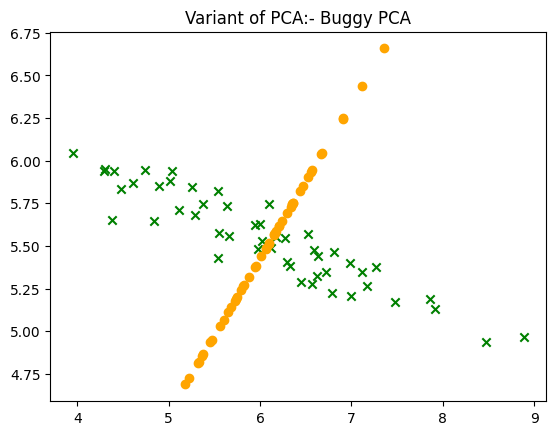

In [5]:
# Plot for Buggy PCA with 2D Data

bv, bz, bx = pca_buggy(twod_data, 1)
plot_2d_pca(twod_data, bx)
plt.title("Variant of PCA:- Buggy PCA")
plt.show()

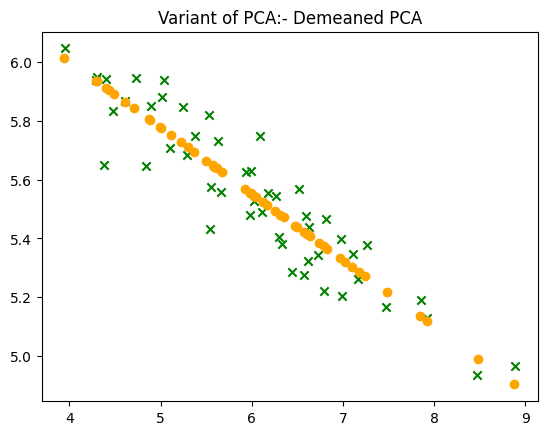

In [6]:
# Plot for Demeaned PCA with 2D Data

dv, dz, dx = pca_demeaned(twod_data, 1)
plot_2d_pca(twod_data, dx)
plt.title("Variant of PCA:- Demeaned PCA")
plt.show()

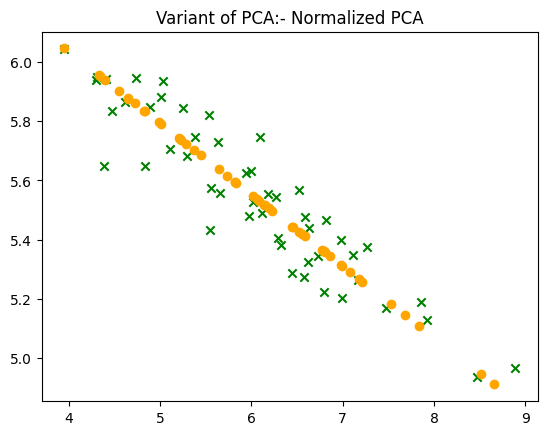

In [7]:
# Plot for Normalized PCA with 2D Data

nv, nz, nx = pca_normalized(twod_data, 1)
plot_2d_pca(twod_data, nx)
plt.title("Variant of PCA:- Normalized PCA")
plt.show()

In [8]:
# Printing the values for the reconstruction error for 2D Data for all the three varieties of PCA

print("Reconstruction Error for Buggy PCA for 2D Data:- ",reconstruction_error(twod_data, bx))
print("Reconstruction Error for Demeaned PCA for 2D Data:- ",reconstruction_error(twod_data, dx))
print("Reconstruction Error for Normalized PCA for 2D Data:- ",reconstruction_error(twod_data, nx))

Reconstruction Error for Buggy PCA for 2D Data:-  0.886903
Reconstruction Error for Demeaned PCA for 2D Data:-  0.010006
Reconstruction Error for Normalized PCA for 2D Data:-  0.049472


In [9]:
# Defining the DRO function

def dro(X, k):
    d = X.shape[1]
    X_dro = X.copy()
    b = np.mean(X_dro, axis=0)
    Q = X_dro - b
    u, s, vt = np.linalg.svd(Q)
    A = vt[range(k)].reshape((d, k))
    Z = np.matmul(Q, A)
    return b, A, Z

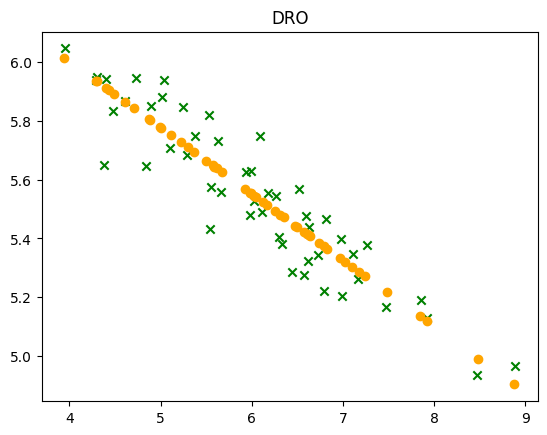

In [10]:
# Plotting the DRO function

b2d, A2d, Z2d = dro(twod_data, 1)
X2d = np.matmul(Z2d, A2d.T) + b2d
plot_2d_pca(twod_data, X2d)
plt.title("DRO")
b1000d, A1000d, Z1000d = dro(thousandd_data, 500)
X1000d = np.matmul(Z1000d, A1000d.T) + b1000d

In [11]:
# Printing the values for the reconstruction error for 2D Data and 1000D Data for DRO

print("Reconstruction Error for DRO for 2D Data:- ",reconstruction_error(twod_data, X2d))
print("Reconstruction Error for DRO for 1000D Data:- ",reconstruction_error(thousandd_data, X1000d))

Reconstruction Error for DRO for 2D Data:-  0.010006
Reconstruction Error for DRO for 1000D Data:-  18509.034142


In [12]:
# Plots for Reconstruction Error vs all the three varieties of PCA

k = [100, 200, 300, 400, 500, 600, 700, 800, 900]
buggy_rc_error = []
demeaned_rc_error = []
normalized_rc_error = []
for i in range(len(k)):
  bv, bz, bx = pca_buggy(thousandd_data, k[i])
  buggy_rc_error.append(reconstruction_error(thousandd_data, bx))
  dv, dz, dx = pca_demeaned(thousandd_data, k[i])
  demeaned_rc_error.append(reconstruction_error(thousandd_data, dx))
  nv, nz, nx = pca_normalized(thousandd_data, k[i])
  normalized_rc_error.append(reconstruction_error(thousandd_data, nx))

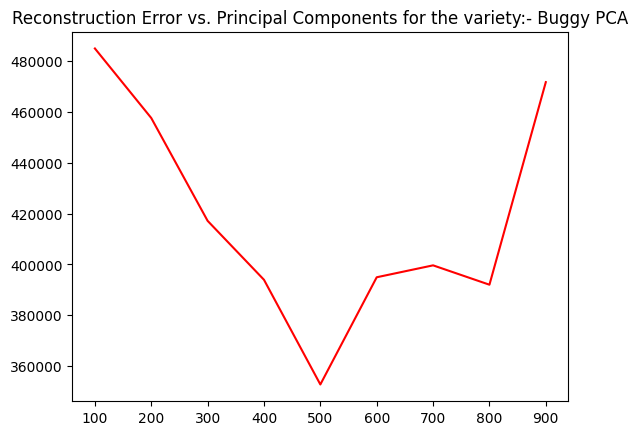

In [13]:
plt.plot(k, buggy_rc_error,color="red")
plt.title("Reconstruction Error vs. Principal Components for the variety:- Buggy PCA")
plt.show()

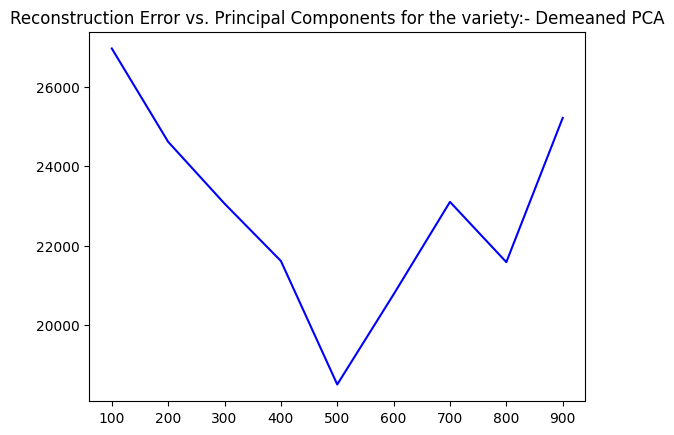

In [14]:
plt.plot(k, demeaned_rc_error, color="blue")
plt.title("Reconstruction Error vs. Principal Components for the variety:- Demeaned PCA")
plt.show()

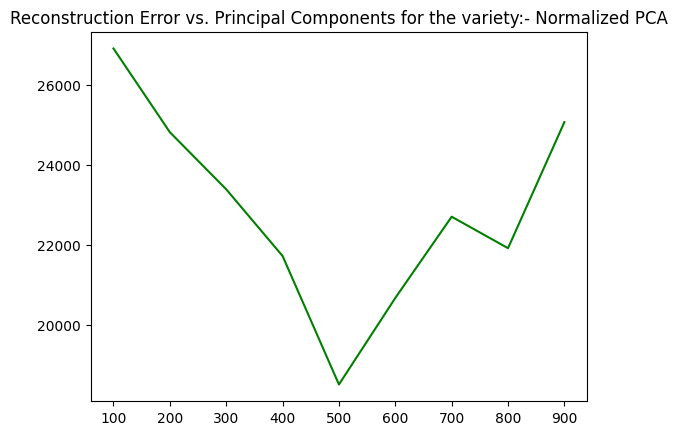

In [15]:
plt.plot(k, normalized_rc_error, color="green")
plt.title("Reconstruction Error vs. Principal Components for the variety:- Normalized PCA")
plt.show()

In [16]:
# Printing the values for the reconstruction error for 1000D Data for all the three varieties of PCA

bv, bz, bx = pca_buggy(thousandd_data, 500)
print("Reconstruction Error for Buggy PCA for 1000D Data:- ",reconstruction_error(thousandd_data, bx))

dv, dz, dx = pca_demeaned(thousandd_data, 500)
print("Reconstruction Error for Demeaned PCA for 1000D Data:- ",reconstruction_error(thousandd_data, dx))

nv, nz, nx = pca_normalized(thousandd_data, 500)
print("Reconstruction Error for Normalized PCA for 1000D Data:- ",reconstruction_error(thousandd_data, nx))

Reconstruction Error for Buggy PCA for 1000D Data:-  352741.458071
Reconstruction Error for Demeaned PCA for 1000D Data:-  18509.034142
Reconstruction Error for Normalized PCA for 1000D Data:-  18503.200987
